```marrkdown
src\eval\comprehensive_comparison.py
```


COMPREHENSIVE FILE COMPARISON ANALYSIS

Directory 1: ../data/contents
Directory 2: ../data/grammar

Initializing Embedding Models...

1. Loading DangVanTuan Embedding...
Đang tải dangvantuan/vietnamese-document-embedding model...
✓ Model dangvantuan/vietnamese-document-embedding đã tải xong trên cuda

2. Loading Qwen Embedding...
Đang tải Qwen/Qwen3-Embedding-0.6B model...
✓ Model Qwen/Qwen3-Embedding-0.6B đã tải xong trên cuda với bfloat16

3. Loading Halong Embedding...
Đang tải hiieu/halong_embedding model...
✓ Model hiieu/halong_embedding đã tải xong trên cuda

Processing 161 file pairs...


Comparing files: 100%|██████████| 161/161 [09:52<00:00,  3.68s/it]



✓ Saved results to: comprehensive_results.csv

Creating Comprehensive Visualization...


C:\Users\lea26\AppData\Local\Temp\ipykernel_21460\2511168762.py:409: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



✓ Saved: comprehensive_analysis.png


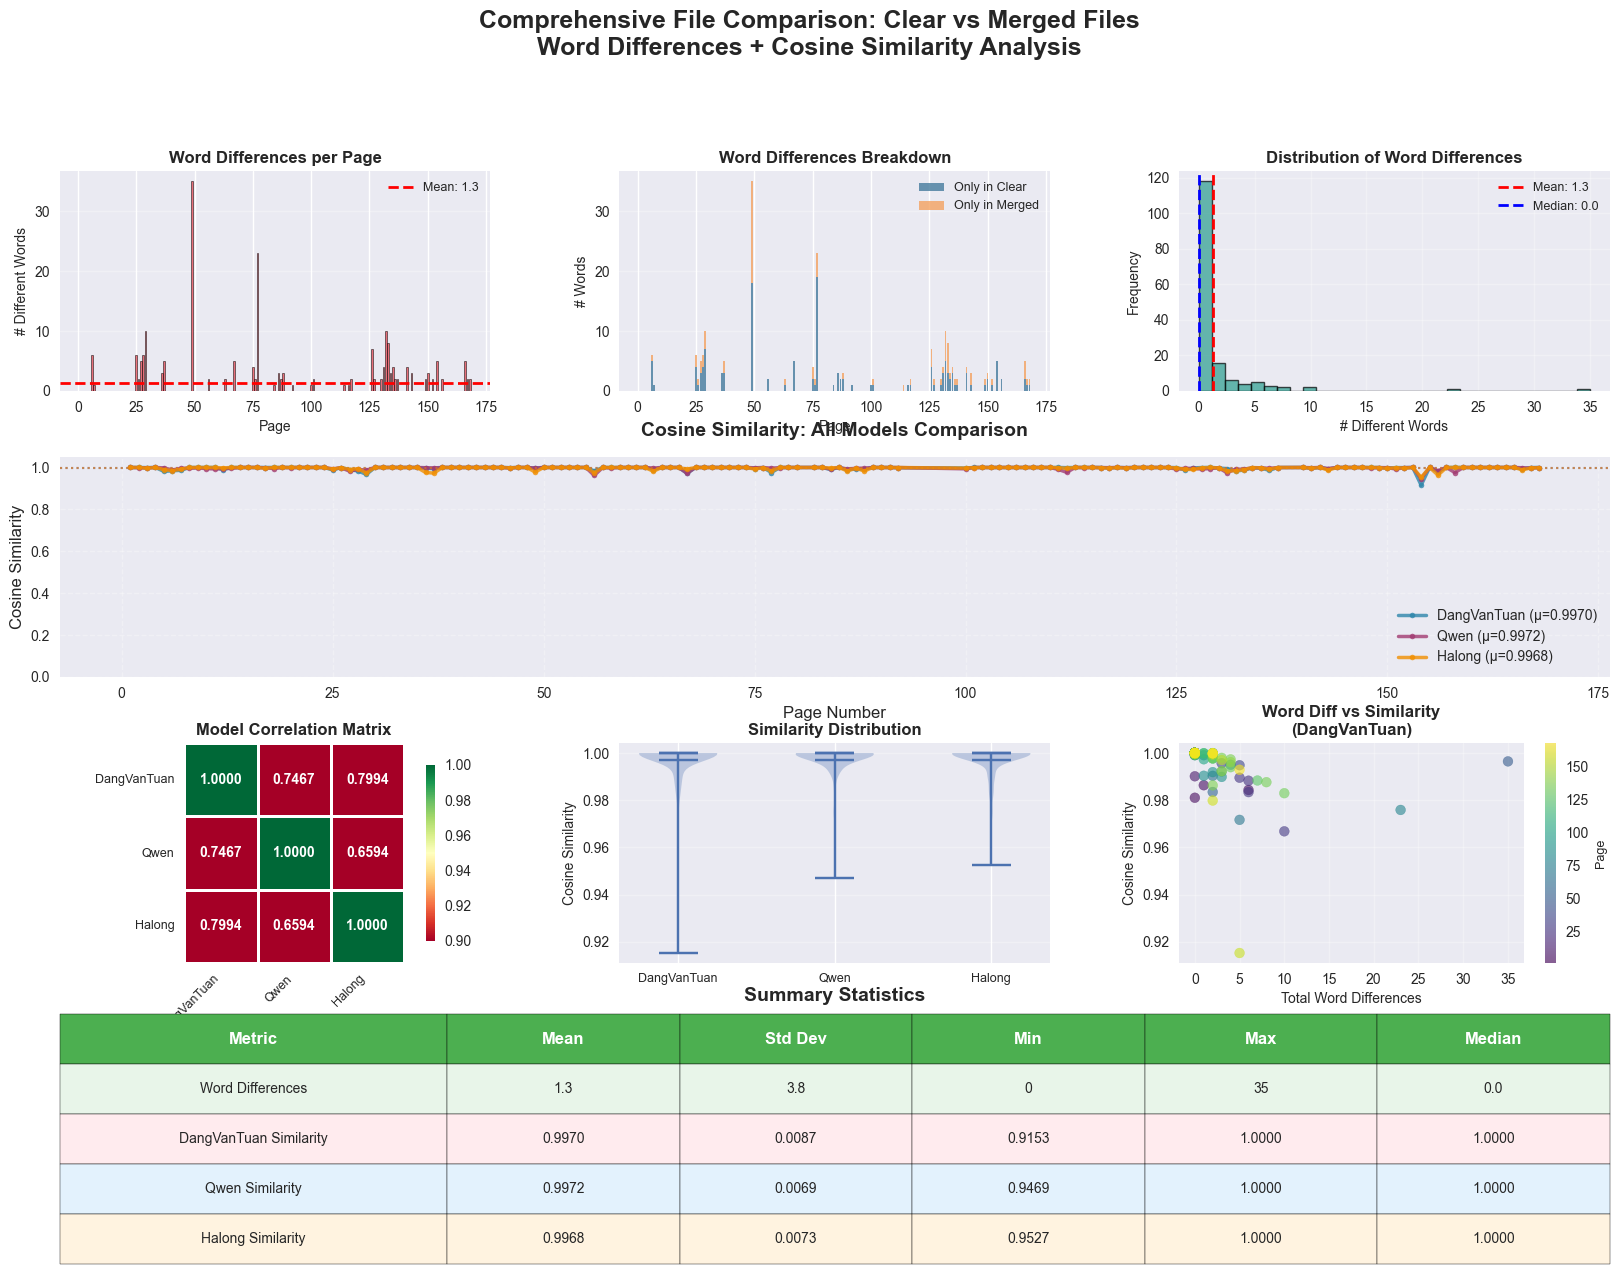


COMPREHENSIVE ANALYSIS REPORT

--------------------------------------------------------------------------------
1. WORD DIFFERENCES ANALYSIS
--------------------------------------------------------------------------------
Total files compared: 158
Files with NO differences: 112
Files with differences: 46
Average word differences: 1.32
Max word differences: 35 (Page 49)
Min word differences: 0

--------------------------------------------------------------------------------
2. COSINE SIMILARITY ANALYSIS
--------------------------------------------------------------------------------

DangVanTuan:
  Mean:   0.9970
  Std:    0.0087
  Min:    0.9153 (Page 154)
  Max:    1.0000 (Page 21)
  Median: 1.0000

Qwen:
  Mean:   0.9972
  Std:    0.0069
  Min:    0.9469 (Page 154)
  Max:    1.0000 (Page 4)
  Median: 1.0000

Halong:
  Mean:   0.9968
  Std:    0.0073
  Min:    0.9527 (Page 154)
  Max:    1.0000 (Page 44)
  Median: 1.0000

--------------------------------------------------------------

In [4]:
"""
Comprehensive File Comparison Tool
Kết hợp:
1. Word differences analysis (từ count_grammar.py)
2. Cosine similarity với 3 embedding models
3. Visualization tổng hợp trong 1 figure duy nhất
"""

import os
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from pathlib import Path
import sys

# Thêm project root vào sys.path
# In Jupyter Notebook, use os.getcwd() instead of __file__
script_dir = Path(os.getcwd())
project_root = script_dir.parent.parent if 'src' in str(script_dir) else script_dir
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from src.models.dangvantuan_embedd import DangVanTuanEmbedding
from src.models.embedd import QwenEmbedding
from src.models.halong_embedd import HalongEmbedding


# ============================================================================
# PART 1: WORD DIFFERENCES ANALYSIS
# ============================================================================

def get_words_from_file(file_path):
    """Extract all words from a text file"""
    words = []
    if not os.path.isfile(file_path):
        return words
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read().lower()
            file_words = [word.strip() for word in content.split() if word.strip()]
            words.extend(file_words)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
    return words


def is_number(word):
    """Check if a word is a number"""
    try:
        float(word.replace(',', '').replace('.', '').replace('%', ''))
        return True
    except ValueError:
        return False


def compare_words(file1, file2):
    """Compare two files for word differences"""
    words1 = get_words_from_file(file1)
    words2 = get_words_from_file(file2)
    
    # Create sets excluding numbers
    set1 = set(word for word in words1 if not is_number(word))
    set2 = set(word for word in words2 if not is_number(word))
    
    only_in_file1 = set1 - set2
    only_in_file2 = set2 - set1
    common_words = set1 & set2
    
    return {
        'total_words_1': len(words1),
        'total_words_2': len(words2),
        'unique_words_1': len(set1),
        'unique_words_2': len(set2),
        'only_in_1': len(only_in_file1),
        'only_in_2': len(only_in_file2),
        'common': len(common_words),
        'total_diff': len(only_in_file1) + len(only_in_file2)
    }


# ============================================================================
# PART 2: COSINE SIMILARITY ANALYSIS
# ============================================================================

def read_file_content(file_path):
    """Read file content"""
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            return f.read().strip()
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return ""


def calculate_similarities(content1, content2, models):
    """Calculate cosine similarity with all available models"""
    results = {}
    for model_name, model in models.items():
        try:
            sim = model.calculate_similarity(content1, content2)
            results[model_name] = float(sim)
        except Exception as e:
            print(f"\n✗ Error with {model_name}: {e}")
            results[model_name] = 0.0
    return results


# ============================================================================
# PART 3: MAIN COMPARISON FUNCTION
# ============================================================================

def comprehensive_comparison(dir1, dir2, suffix1='_clear.txt', suffix2='_merged.txt', 
                            max_text_length=1500):
    """
    Tổng hợp phân tích:
    - Word differences
    - Cosine similarity (3 models)
    """
    
    print("\n" + "="*80)
    print("COMPREHENSIVE FILE COMPARISON ANALYSIS")
    print("="*80)
    print(f"\nDirectory 1: {dir1}")
    print(f"Directory 2: {dir2}")
    
    # Initialize embedding models
    print("\n" + "="*80)
    print("Initializing Embedding Models...")
    print("="*80)
    
    models = {}
    try:
        print("\n1. Loading DangVanTuan Embedding...")
        models['DangVanTuan'] = DangVanTuanEmbedding()
    except Exception as e:
        print(f"   ✗ Failed: {e}")
    
    try:
        print("\n2. Loading Qwen Embedding...")
        models['Qwen'] = QwenEmbedding()
    except Exception as e:
        print(f"   ✗ Failed: {e}")
    
    try:
        print("\n3. Loading Halong Embedding...")
        models['Halong'] = HalongEmbedding()
    except Exception as e:
        print(f"   ✗ Failed: {e}")
    
    if not models:
        print("\n✗ No models loaded successfully!")
        return None
    
    # Get file list
    files1 = sorted([f for f in os.listdir(dir1) if f.endswith(suffix1)])
    
    print("\n" + "="*80)
    print(f"Processing {len(files1)} file pairs...")
    print("="*80)
    
    results = []
    
    for file1 in tqdm(files1, desc="Comparing files"):
        base_name = file1.replace(suffix1, '')
        file2 = base_name + suffix2
        page_num = int(re.search(r'page_cleared_(\d+)', file1).group(1))
        
        path1 = os.path.join(dir1, file1)
        path2 = os.path.join(dir2, file2)
        
        if not os.path.exists(path2):
            continue
        
        # Word differences
        word_diff = compare_words(path1, path2)
        
        # Cosine similarity
        content1 = read_file_content(path1)
        content2 = read_file_content(path2)
        
        if len(content1) > max_text_length:
            content1 = content1[:max_text_length]
        if len(content2) > max_text_length:
            content2 = content2[:max_text_length]
        
        similarities = calculate_similarities(content1, content2, models)
        
        # Combine results
        result = {
            'page': page_num,
            'file1': file1,
            'file2': file2,
            **word_diff,
            **{f'sim_{k}': v for k, v in similarities.items()}
        }
        results.append(result)
    
    return pd.DataFrame(results).sort_values('page')


# ============================================================================
# PART 4: UNIFIED VISUALIZATION
# ============================================================================

def create_comprehensive_visualization(df, output_file='comprehensive_analysis.png'):
    """
    Tạo 1 figure duy nhất với tất cả thông tin:
    - Word differences
    - Cosine similarities (3 models)
    - Correlation analysis
    - Summary statistics
    """
    
    print("\n" + "="*80)
    print("Creating Comprehensive Visualization...")
    print("="*80)
    
    # Set style
    plt.style.use('seaborn-v0_8')
    
    # Create figure with subplots
    fig = plt.figure(figsize=(20, 14))
    gs = fig.add_gridspec(4, 3, hspace=0.3, wspace=0.3)
    
    fig.suptitle('Comprehensive File Comparison: Clear vs Merged Files\n' + 
                 'Word Differences + Cosine Similarity Analysis',
                 fontsize=18, fontweight='bold', y=0.995)
    
    # Color scheme
    colors = {'DangVanTuan': '#2E86AB', 'Qwen': '#A23B72', 'Halong': '#F18F01'}
    
    # ========== ROW 1: Word Differences Analysis ==========
    
    # 1.1: Total word differences per page
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.bar(df['page'], df['total_diff'], alpha=0.7, color='#E63946', edgecolor='black', linewidth=0.5)
    ax1.axhline(y=df['total_diff'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Mean: {df["total_diff"].mean():.1f}')
    ax1.set_title('Word Differences per Page', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Page', fontsize=10)
    ax1.set_ylabel('# Different Words', fontsize=10)
    ax1.legend(fontsize=9)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # 1.2: Breakdown of differences
    ax2 = fig.add_subplot(gs[0, 1])
    width = 0.8
    ax2.bar(df['page'], df['only_in_1'], width, label='Only in Clear', 
            alpha=0.8, color='#457B9D')
    ax2.bar(df['page'], df['only_in_2'], width, bottom=df['only_in_1'],
            label='Only in Merged', alpha=0.8, color='#F4A261')
    ax2.set_title('Word Differences Breakdown', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Page', fontsize=10)
    ax2.set_ylabel('# Words', fontsize=10)
    ax2.legend(fontsize=9)
    ax2.grid(True, alpha=0.3, axis='y')
    
    # 1.3: Distribution of differences
    ax3 = fig.add_subplot(gs[0, 2])
    ax3.hist(df['total_diff'], bins=30, alpha=0.7, color='#2A9D8F', 
             edgecolor='black', linewidth=1)
    ax3.axvline(x=df['total_diff'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Mean: {df["total_diff"].mean():.1f}')
    ax3.axvline(x=df['total_diff'].median(), color='blue', linestyle='--',
                linewidth=2, label=f'Median: {df["total_diff"].median():.1f}')
    ax3.set_title('Distribution of Word Differences', fontsize=12, fontweight='bold')
    ax3.set_xlabel('# Different Words', fontsize=10)
    ax3.set_ylabel('Frequency', fontsize=10)
    ax3.legend(fontsize=9)
    ax3.grid(True, alpha=0.3)
    
    # ========== ROW 2: Cosine Similarity Overlay ==========
    
    ax4 = fig.add_subplot(gs[1, :])
    
    for model_name, color in colors.items():
        col = f'sim_{model_name}'
        if col in df.columns:
            mean_val = df[col].mean()
            ax4.plot(df['page'], df[col], marker='o', linewidth=2.5, 
                    markersize=4, color=color, alpha=0.8, 
                    label=f'{model_name} (μ={mean_val:.4f})')
            ax4.axhline(y=mean_val, color=color, linestyle=':', 
                       linewidth=1.5, alpha=0.5)
    
    ax4.set_title('Cosine Similarity: All Models Comparison', 
                 fontsize=14, fontweight='bold', pad=15)
    ax4.set_xlabel('Page Number', fontsize=12)
    ax4.set_ylabel('Cosine Similarity', fontsize=12)
    ax4.set_ylim([0, 1.05])
    ax4.legend(loc='lower right', fontsize=10, framealpha=0.9)
    ax4.grid(True, alpha=0.3, linestyle='--')
    
    # ========== ROW 3: Correlation & Distribution ==========
    
    # 3.1: Correlation matrix
    ax5 = fig.add_subplot(gs[2, 0])
    sim_cols = [c for c in df.columns if c.startswith('sim_')]
    if len(sim_cols) > 1:
        corr_matrix = df[sim_cols].corr()
        sns.heatmap(corr_matrix, annot=True, fmt='.4f', cmap='RdYlGn',
                   square=True, linewidths=2, cbar_kws={"shrink": 0.8},
                   vmin=0.9, vmax=1.0, center=0.95, ax=ax5,
                   annot_kws={'size': 10, 'weight': 'bold'})
        ax5.set_title('Model Correlation Matrix', fontsize=12, fontweight='bold')
        ax5.set_xticklabels([c.replace('sim_', '') for c in sim_cols], 
                           rotation=45, ha='right', fontsize=9)
        ax5.set_yticklabels([c.replace('sim_', '') for c in sim_cols], 
                           rotation=0, fontsize=9)
    
    # 3.2: Similarity distribution (violin plot)
    ax6 = fig.add_subplot(gs[2, 1])
    sim_data = []
    for col in sim_cols:
        model_name = col.replace('sim_', '')
        for val in df[col]:
            sim_data.append({'Model': model_name, 'Similarity': val})
    
    if sim_data:
        sim_df = pd.DataFrame(sim_data)
        parts = ax6.violinplot([sim_df[sim_df['Model'] == m]['Similarity'].values 
                                for m in ['DangVanTuan', 'Qwen', 'Halong'] 
                                if f'sim_{m}' in df.columns],
                               positions=range(len([m for m in ['DangVanTuan', 'Qwen', 'Halong'] 
                                                    if f'sim_{m}' in df.columns])),
                               showmeans=True, showmedians=True)
        ax6.set_xticks(range(len([m for m in ['DangVanTuan', 'Qwen', 'Halong'] 
                                  if f'sim_{m}' in df.columns])))
        ax6.set_xticklabels([m for m in ['DangVanTuan', 'Qwen', 'Halong'] 
                            if f'sim_{m}' in df.columns], rotation=0, fontsize=9)
        ax6.set_title('Similarity Distribution', fontsize=12, fontweight='bold')
        ax6.set_ylabel('Cosine Similarity', fontsize=10)
        ax6.grid(True, alpha=0.3, axis='y')
    
    # 3.3: Scatter: Word Diff vs Similarity
    ax7 = fig.add_subplot(gs[2, 2])
    if 'sim_DangVanTuan' in df.columns:
        scatter = ax7.scatter(df['total_diff'], df['sim_DangVanTuan'], 
                             c=df['page'], cmap='viridis', alpha=0.6, s=50)
        ax7.set_title('Word Diff vs Similarity\n(DangVanTuan)', 
                     fontsize=12, fontweight='bold')
        ax7.set_xlabel('Total Word Differences', fontsize=10)
        ax7.set_ylabel('Cosine Similarity', fontsize=10)
        ax7.grid(True, alpha=0.3)
        cbar = plt.colorbar(scatter, ax=ax7)
        cbar.set_label('Page', fontsize=9)
    
    # ========== ROW 4: Summary Statistics Table ==========
    
    ax8 = fig.add_subplot(gs[3, :])
    ax8.axis('off')
    
    # Prepare summary data
    summary_data = []
    
    # Word differences stats
    summary_data.append([
        'Word Differences',
        f"{df['total_diff'].mean():.1f}",
        f"{df['total_diff'].std():.1f}",
        f"{df['total_diff'].min():.0f}",
        f"{df['total_diff'].max():.0f}",
        f"{df['total_diff'].median():.1f}"
    ])
    
    # Similarity stats for each model
    for model_name in ['DangVanTuan', 'Qwen', 'Halong']:
        col = f'sim_{model_name}'
        if col in df.columns:
            summary_data.append([
                f'{model_name} Similarity',
                f"{df[col].mean():.4f}",
                f"{df[col].std():.4f}",
                f"{df[col].min():.4f}",
                f"{df[col].max():.4f}",
                f"{df[col].median():.4f}"
            ])
    
    # Create table
    table = ax8.table(cellText=summary_data,
                     colLabels=['Metric', 'Mean', 'Std Dev', 'Min', 'Max', 'Median'],
                     cellLoc='center',
                     loc='center',
                     colWidths=[0.25, 0.15, 0.15, 0.15, 0.15, 0.15])
    
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 3)
    
    # Style header
    for i in range(6):
        table[(0, i)].set_facecolor('#4CAF50')
        table[(0, i)].set_text_props(weight='bold', color='white', size=12)
    
    # Color rows
    row_colors = ['#E8F5E9', '#FFEBEE', '#E3F2FD', '#FFF3E0', '#F3E5F5']
    for i in range(1, len(summary_data) + 1):
        for j in range(6):
            table[(i, j)].set_facecolor(row_colors[i-1])
            table[(i, j)].set_text_props(size=10)
    
    ax8.set_title('Summary Statistics', fontsize=14, fontweight='bold', pad=20)
    
    # Save figure
    plt.tight_layout()
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print(f"\n✓ Saved: {output_file}")
    
    plt.show()


# ============================================================================
# PART 5: DETAILED REPORT
# ============================================================================

def print_comprehensive_report(df):
    """Print detailed text report"""
    
    print("\n" + "="*80)
    print("COMPREHENSIVE ANALYSIS REPORT")
    print("="*80)
    
    print("\n" + "-"*80)
    print("1. WORD DIFFERENCES ANALYSIS")
    print("-"*80)
    print(f"Total files compared: {len(df)}")
    print(f"Files with NO differences: {len(df[df['total_diff'] == 0])}")
    print(f"Files with differences: {len(df[df['total_diff'] > 0])}")
    print(f"Average word differences: {df['total_diff'].mean():.2f}")
    print(f"Max word differences: {df['total_diff'].max():.0f} (Page {df.loc[df['total_diff'].idxmax(), 'page']})")
    print(f"Min word differences: {df['total_diff'].min():.0f}")
    
    print("\n" + "-"*80)
    print("2. COSINE SIMILARITY ANALYSIS")
    print("-"*80)
    
    for model in ['DangVanTuan', 'Qwen', 'Halong']:
        col = f'sim_{model}'
        if col in df.columns:
            print(f"\n{model}:")
            print(f"  Mean:   {df[col].mean():.4f}")
            print(f"  Std:    {df[col].std():.4f}")
            print(f"  Min:    {df[col].min():.4f} (Page {df.loc[df[col].idxmin(), 'page']})")
            print(f"  Max:    {df[col].max():.4f} (Page {df.loc[df[col].idxmax(), 'page']})")
            print(f"  Median: {df[col].median():.4f}")
    
    print("\n" + "-"*80)
    print("3. TOP 10 PROBLEMATIC PAGES")
    print("-"*80)
    
    # Combined score: normalize both metrics and take average
    df_temp = df.copy()
    df_temp['word_diff_norm'] = (df_temp['total_diff'] - df_temp['total_diff'].min()) / (df_temp['total_diff'].max() - df_temp['total_diff'].min())
    
    if 'sim_DangVanTuan' in df_temp.columns:
        df_temp['sim_inv_norm'] = 1 - df_temp['sim_DangVanTuan']
        df_temp['combined_score'] = (df_temp['word_diff_norm'] + df_temp['sim_inv_norm']) / 2
        
        top_problematic = df_temp.nlargest(10, 'combined_score')
        
        print(f"\n{'Page':<8} {'Word Diff':<12} {'DangVanTuan':<15} {'Qwen':<15} {'Halong':<15}")
        print("-" * 80)
        for _, row in top_problematic.iterrows():
            qwen_val = row.get('sim_Qwen', 0)
            halong_val = row.get('sim_Halong', 0)
            print(f"{row['page']:<8.0f} {row['total_diff']:<12.0f} "
                  f"{row['sim_DangVanTuan']:<15.4f} {qwen_val:<15.4f} {halong_val:<15.4f}")
    
    print("\n" + "-"*80)
    print("4. TOP 10 PERFECT PAGES")
    print("-"*80)
    
    if 'sim_DangVanTuan' in df.columns:
        df_temp['perfect_score'] = df_temp['sim_DangVanTuan'] - df_temp['word_diff_norm']
        top_perfect = df_temp.nlargest(10, 'perfect_score')
        
        print(f"\n{'Page':<8} {'Word Diff':<12} {'DangVanTuan':<15} {'Qwen':<15} {'Halong':<15}")
        print("-" * 80)
        for _, row in top_perfect.iterrows():
            qwen_val = row.get('sim_Qwen', 0)
            halong_val = row.get('sim_Halong', 0)
            print(f"{row['page']:<8.0f} {row['total_diff']:<12.0f} "
                  f"{row['sim_DangVanTuan']:<15.4f} {qwen_val:<15.4f} {halong_val:<15.4f}")


# ============================================================================
# MAIN EXECUTION
# ============================================================================

if __name__ == "__main__":
    # Directories
    dir1 = f'../data/contents'
    dir2 = f'../data/grammar'
    
    # Run comprehensive comparison
    df_results = comprehensive_comparison(dir1, dir2, '.txt', '.txt')
    
    if df_results is not None:
        # Save to CSV
        output_csv = 'comprehensive_results.csv'
        df_results.to_csv(output_csv, index=False, encoding='utf-8')
        print(f"\n✓ Saved results to: {output_csv}")
        
        # Save to JSON
        # output_json = 'src/analysis/comprehensive_results.json'
        # df_results.to_json(output_json, orient='records', indent=2, force_ascii=False)
        # print(f"✓ Saved results to: {output_json}")
        
        # Create comprehensive visualization
        create_comprehensive_visualization(df_results, 
                                          'comprehensive_analysis.png')
        
        # Print detailed report
        print_comprehensive_report(df_results)
        
        print("\n" + "="*80)
        print("ANALYSIS COMPLETE!")
        print("="*80)
        print("\nGenerated files:")
        print("  - comprehensive_results.csv")
        print("  - comprehensive_results.json")
        print("  - comprehensive_analysis.png")


In [ ]:
from marker.converters.ocr import OCRConverter
from marker.models import create_model_dict

converter = OCRConverter(
    artifact_dict=create_model_dict(),
)
rendered = converter("../data/images/page_13.png")

In [7]:
%marker_single src/data/images/page_13.png --output_format markdown --force_ocr --output_dir src/data/output

UsageError: Line magic function `%marker_single` not found.
